# The Data Story inside Steinbeck's Cannery Row

## The Collapse of the Sardine Fishery in Monterrey California

By the mid-1940s, sardine fishing in Monterrey bay was a booming industry. However, the fishery experienced a sudden collapse in the early 1950s. Cannery Row is a story that showcases the industry and community immediately before this collapse. Using a few different datasets, investigate the patterns of the collapse and later recovery, as well as an environmental factor that may be related.

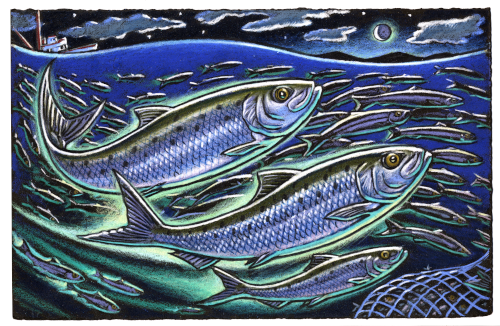

#### Prep Code
This is the same general first step in almost any code script. Here you will import all the libraries you will use, set your working directory, and import the staged datasets from your repository. 

In [150]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

os.chdir("C:/Users/drewc/Documents/GitHub/stories")

temp = pd.read_csv("data/scripps_temps_stage.csv")
temp.info()

ueber = pd.read_csv("data/ueber_landings_stage.csv")
ueber.info()

noaa = pd.read_csv("data/noaa_master_stage.csv")
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 5 columns):
Year      37356 non-null int64
Month     37356 non-null int64
Day       37356 non-null int64
Surf      36151 non-null float64
Bottom    31775 non-null float64
dtypes: float64(2), int64(3)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
Year    51 non-null int64
Tons    51 non-null int64
dtypes: int64(2)
memory usage: 896.0 bytes


C:\Users\drewc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
Year       109915 non-null float64
State      109915 non-null object
Species    109915 non-null object
Pounds     109908 non-null float64
Tons       1048575 non-null float64
Dollars    109894 non-null float64
dtypes: float64(4), object(2)
memory usage: 48.0+ MB


### Monterrey Finshing Data Before 1970

Sourced from an older text of printed records, the Ueber dataset below shows Sardine landings from 1927 to 1963 in Monterrey.

##### (Manual Data Entry Video) 
While this dataset is a great resource, it does require an individual to input data manually. Watch the video below to get a brief set of tips when doing manual data entry

#### Plot Monterrey Data
Using the ueber dataset, create a plot that shows year and tons. Be sure to provide infromative labels and legends. 

Text(0.5, 1.0, 'Sardines Harvested in Monterrey')

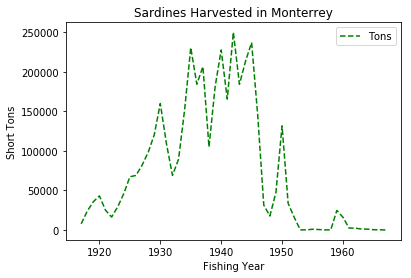

In [151]:
xu = ueber["Year"]
yu = ueber["Tons"]
plt.plot(xu, yu, 'g--')
plt.ylabel("Short Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in Monterrey")

#### Discussion Questions:
1. How does the data portrayed in the graph relate to the story?
2. Based on Steinbecks portrayal of Cannery Row in 1945, what do you think may have led to the collapse? 

### Water Temperature Data from La Jolla Pier

Before and after the the collapse, the sardine fishery fluctuated by year. While some of this may be due to chance, environmental factors may be related to size of the Sardine population. Below is a dataset taken from researchers at UC Santa Barbara that records the water temperature at the surf and bottom of La Jolla Pier in Monterrey. 

##### (Data Staging Video)

Just like any dataset of observations, you will need to stage the raw data to be usable in your analysis. Watch the video below to get a brief set of tips on staging data from raw observations. 

#### Group Temperature Data by Day, Month, and Year average

The dataset provides a reading for most days of each month of each year back to 1917. In order to plot this data with yearly landings, we will need the average temperature for each year. Use the groupby function in pandas to do this. 

In [152]:
gtemp = temp.groupby(["Year", "Month", "Day"]).mean()
gsurf = gtemp.groupby("Year")["Surf"].mean() 
gbott = gtemp.groupby("Year")["Bottom"].mean() 

#### Convert Series to Frame, Reset Index, and Combine back together

Because this function creates each indivudal mean as its own series, redefine the variables as dataframes and combine back together. 

In [153]:
dsurf = gsurf.to_frame()
dbott = gbott.to_frame()

isurf = dsurf.reset_index(level=["Year"])
ibott = dbott.reset_index(level=["Year"])

ibott["Surf"] = isurf["Surf"]
tm = ibott

#### Create Plot with Labels, Title and Legend

Using the temp dataset, create a plot that shows year and temperature. Be sure to provide infromative labels and legends. 

Text(0.5, 1.0, 'Bottom Temperature at La Jolla Pier')

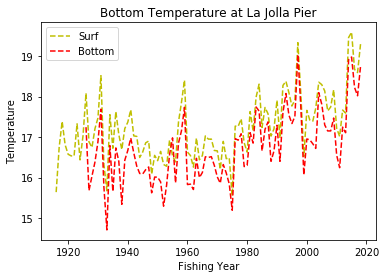

In [154]:
xtm = tm["Year"]
ytms = tm["Surf"]
plt.plot(xtm, ytms, 'y--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Surf Temperature at La Jolla Pier")

ytmb = tm["Bottom"]
plt.plot(xtm, ytmb, 'r--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Bottom Temperature at La Jolla Pier")

#### Plot All Data Together before 1963

Using both the ueber and the temp dataset, create a combined plot with surf temperature and tons before 1965. This will provide complete paired data for an entire year range to observe. In order to show a graph with two different y-axis, create a plot with two axes and set the x axis to match. Be sure to include the correct labels and legends as well as save the output in your fig folder. 

In [155]:
tm65 = tm[tm.Year < 1965]

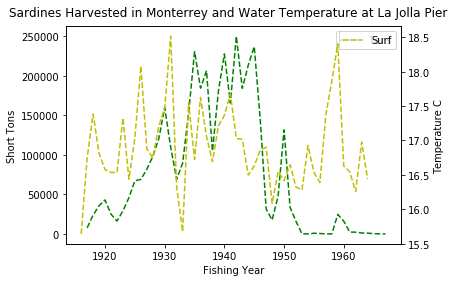

In [156]:
fig, ax1 = plt.subplots()

xu = ueber["Year"]
yu = ueber["Tons"]
plt.plot(xu, yu, 'g--')
plt.ylabel("Short Tons")
plt.xlabel("Fishing Year")
plt.legend()

ax2 = ax1.twinx()

xta = tm65["Year"]
ysa = tm65["Surf"]
ax2.plot(xta, ysa, "y--")
ax2.set_ylabel("Temperature C")
ax2.legend()

fig.suptitle("Sardines Harvested in Monterrey and Water Temperature at La Jolla Pier", y = 0.95, fontsize = 12)
fig.savefig("fig/fish_plot_uebertemp.jpeg")

#### Discussion Questions:
1. How does the data portrayed in the graph relate to the story?
2. What kind of relationship do we think may be happening with the Sardine population? 
3. In order to investigate this relationship, what would we need to do next?

### Statistical Assessment of Pre-Collapse Years
The years 1927 to 1945 witnessed a fully developed fishing industry as well as a not yet depleted sardine poluation. Use this time period to analyze the relationship of temperature and landings. 

##### (Linear Regression Video)

While this course is not designed to teach statistics, below is a brief video explaing the why and how of simple linear regression using Pearson's coefficient.  

#### Perform Linear Regression on Pre-Collapse Years (1927-1945)
In order to use the Linear Regression package in Python, you will need to transform your data to a numpy array. Also, you can use print to pull elements of the model and combine them with text to present the output in an easy to understand way. 

In [157]:
tm45 = tm[tm.Year < 1945]
tm2745 = tm45[tm45.Year > 1927]

ueber45 = ueber[ueber.Year < 1945]
ueber2745 = ueber45[ueber45.Year > 1927]

x2745 = np.array(tm2745["Year"]).reshape((-1, 1))
y2745 = np.array(ueber2745["Tons"]).reshape((-1, 1))


model.fit(x2745, y2745)
r2745 = model.score(x2745, y2745)
print("Rsq Pre Collapse Data = ", r2745)

Rsq Pre Collapse Data =  0.448382612149383


#### Discussion Questions
1. What does the Rsq value tell us about the relationship?
2. How would you use this information for managing the fishery int he future?


### California Fishing Data from NOAA after 1950

After the collapse, Sardine fishing was prohibited in the Pacific for an extended time. However, Sardine fishing did resume at smaller levels. Using the NOAA dataset that includes landings for all species in all 50 states since 1950, invesitgate the trends in Sardines in California. 

#### Group NOAA data By Year, State, and Species. Drop Columns.
In the NOAA dataset, there are multiple observations for each year, state ad species indicating that they recorded multiple landings. These would need to be summed in order to provide useful yearly information. Using the same group by function as above, sum these individual observations by state, year, and species.

In [158]:
gnoaa = noaa.groupby(["Year", "State", "Species"], as_index = False).sum()
dnoaa = gnoaa.drop(["Dollars", "Pounds"], axis=1)

#### Filter Dataset for Sardines in California
Since this dataset includes all species and states, filter to only include the  options we want for this analysis. 

In [159]:
snoaa = dnoaa[dnoaa.Species == "SARDINE, PACIFIC"]
ca = snoaa[snoaa.State == "California"]

#### Create Plot with Labels, Title and Legend
Using the ueber dataset, create a plot that shows year and tons. Be sure to provide infromative labels and legends. 

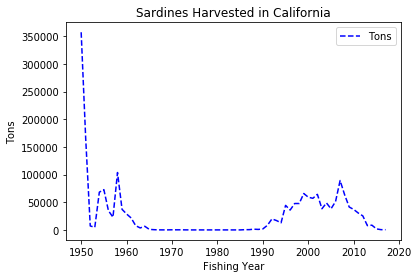

In [160]:
xca = ca["Year"]
yca = ca["Tons"]
plt.plot(xca, yca, 'b--')
plt.ylabel("Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")
plt.show()

#### Drop year 1951 as Outlier and Replot
Based on what we know from other datasets, it appears the 1950 data is an incorrect observation. Remove it from the dataset with a simple greater than function and replot. 

##### (Removing Data Errors Video) 
When working with data, you may find observations that are obvious outliers or some type of error. Watch the video below for some brief tips on removing errors responsibly. 

In [161]:
ca = ca[ca.Year > 1951] 

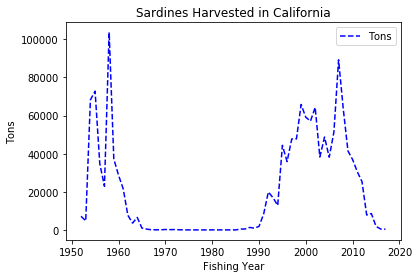

In [162]:
xca = ca["Year"]
yca = ca["Tons"]
plt.plot(xca, yca, 'b--')
plt.ylabel("Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")
plt.show()

#### Plot with Temperature Data after 1951

Using the same code as above, combine the NOAA data with temperatures after 1950. 

In [163]:
tm51 = tm[tm.Year > 1950] 

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

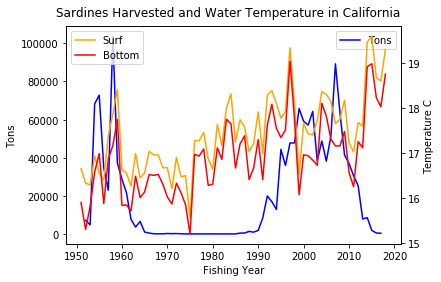

In [164]:
fig, ax1 = plt.subplots()

xca = ca["Year"]
yca = ca["Tons"]
ax1.plot(xca, yca, color = "blue")
ax1.set_ylabel("Tons")
ax1.set_xlabel("Fishing Year")
plt.legend()

ax2 = ax1.twinx()

xtm51 = tm51["Year"]
ytms51 = tm51["Surf"]
ax2.plot(xtm51, ytms51, "orange")
ax2.set_ylabel("Temperature C")

ytmb51 = tm51["Bottom"]
plt.plot(xtm51, ytmb51, "red")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Discussion Questions:
1. When comparing the ueber data with the noaa data alongside temperature, what do you notice?
2. What periods of time do you think would be relevant to study more closely?

### Post Recovery Data Analysis In California

#### Plot All Data Together after 1985
After 1985, the Sardine fishery was reopened for commerical fishing. Select all the data after 1985 and plot. 

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

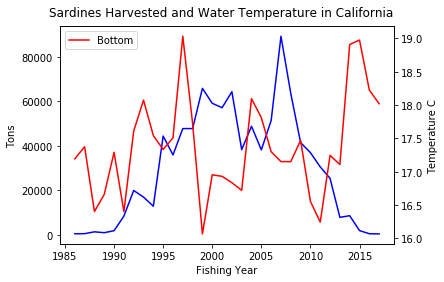

In [165]:
fig, ax1 = plt.subplots()

ca85 = ca[ca.Year > 1985]
xca85 = ca85["Year"]
yca85 = ca85["Tons"]
ax1.plot(xca85, yca85, color = "blue")
ax1.set_ylabel("Tons")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

tm85 = tm[tm.Year > 1985]
tm85 = tm85[tm85.Year < 2018]
xtm85 = tm85["Year"]
ytm85 = tm85["Bottom"]
ax2.plot(xtm85, ytm85, "red")
ax2.set_ylabel("Temperature C")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Perform Linear Regression on Post-Recovery Data
Using the same technique for the Pre-Collapse Data, statistically evaluate the relationship in the Post-Recovery (1985-2010) period. 

In [166]:
model = LinearRegression()

x85 = np.array(tm85["Bottom"]).reshape((-1, 1))
y85 = np.array(ca85["Tons"]).reshape((-1, 1))

model.fit(x85, y85)
r85 = model.score(x85, y85)
print("Rsq of Post Recovery State Data = ", r85)

Rsq of Post Recovery State Data =  0.04356038294606568


#### Discussion Questions
1. Based on the Rsq, is this relationship signifcant?
2. Based on what you see visually in the plot, is there a different way to asses the relationship that may be more accurate?

#### Phase Post-Recovery Data by 10 Years and Check Fit
Based on the visual representation, the data appears to be related to previosu years temperature reading. Phase the data by 10 years and evaluate whether it is n accurate predictor. 

In [168]:
phs10 = tm["Year"] + 10

tm["Phase10"] = phs10

tm10 = tm[tm.Phase10 < 2010]
tm8510 = tm10[tm10.Phase10 > 1985]

ca10 = ca85[ca85.Year < 2010]
ca8510 = ca10[ca10.Year > 1985]

x8510 = np.array(tm8510["Phase10"]).reshape((-1, 1))
y8510 = np.array(ca8510["Tons"]).reshape((-1, 1))

model.fit(x8510, y8510)
r8510 = model.score(x8510, y8510)
print("Rsq 1985 to 2010 with 10 year lag = ", r8510)

Rsq 1985 to 2010 with 10 year lag =  0.6989541586588507


#### Discussion Questions
1. Based on the Rsq, is this relationship signifcant?
2. Why would the temperature from ten years prior be a predictor in the Pos-Recovery period?
3. How would this finding dictate the way you would manage a fishery locally and/or for a state?

## Sardines, Temperature, and Migration Patterns

Based on established research, there exists a relationship in the size of the population fished in different spots in Califronia and the temperature in those regions. Read the text below to hear how Sardine populations migrate and what Sardine fishing was like in the post recovery period. 

##### (Sardine text here)

## Conclusions

#### Pre-Collapse Data

When the older data is assessed, agressive fishing began in 1926 and ended in 1945. When the temperatures are evaluated, there appears to be some assoication between bottom temperature and landings in Monterrey. This indicates that temperature readings could have helped provide information to prevent overfishing and depletion of the population. 

#### Post-Collapse Data

Sardines experienced a significant drop before 1965 and was left unfished for decades. In the mid 1980s, the fishery was recovered enough to resume fishing but was not as plentiful as before. While a direct linear regression was not significant, phasing the data by 10 years showed a strong association. This indicates that temperature trends can have long term impacts as the Sardine population migrates along the Pacific coast. Coordinating local fishing limits based on temperature readings accurately could help mitigate a second depletion from occuring. 

#### Discussion
1. Focusing on Doc's character in the novel, how does he view the natural world differently than the canning industry around him?
2. The community of people living in Cannery Row respect and value Doc. What do they value in his character? 
3. How does Doc and community represent a foil to the canning industry?
4. What values in the community relate to the management of a fishery from a state and local level?
5. What other reflections do you have on fishery management do you have from the data and the novel?

> “Doc would listen to any kind of nonsense and change it for you to a kind of wisdom.”
>
> ― Cannery Row

## Data Challenge: Atlantic Cod

Using the NOAA dataset, isolate the Atlantic Cod among states on the U.S. East Coast and identify trends over time. Use the skills in this story to clean, group, and plot a single state that experienced a similar collapse in the fishery. Discuss your conclusions.

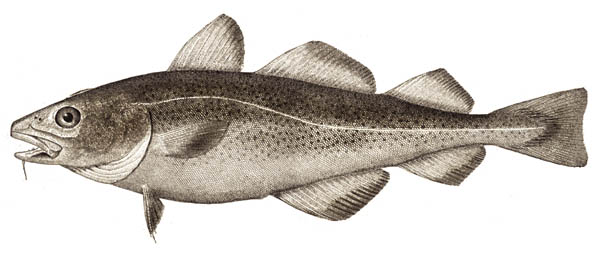

#### [Answer](#answer_key)

******
******
******
******
******
******
******
******
******
******
******
******
******
******

### <a id='answer_key'> Answer </a>

#### Filter Dataset for Atlantic Cod

In [169]:
cod = dnoaa[dnoaa.Species == "COD, ATLANTIC"]

#### Subset and generate plots for North Atlantic states.

In [170]:
ma = cod[cod.State == "Massachusetts"]
me = cod[cod.State == "Maine"]
ct = cod[cod.State == "Connecticut"]
ri = cod[cod.State == "Rhode Island"]
nh = cod[cod.State == "New Hampshire"]
nj = cod[cod.State == "New Jersey"]
md = cod[cod.State == "Maryland"]

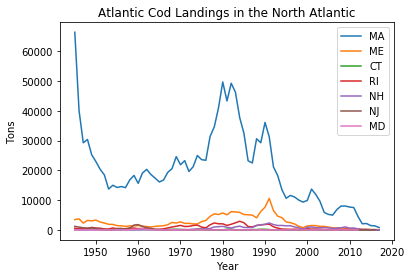

In [171]:
plt.plot(ma.Year, ma.Tons)
plt.plot(me.Year, me.Tons)
plt.plot(ct.Year, ct.Tons)
plt.plot(ri.Year, ri.Tons)
plt.plot(nh.Year, nh.Tons)
plt.plot(nj.Year, nj.Tons)
plt.plot(md.Year, md.Tons)
plt.title("Atlantic Cod Landings in the North Atlantic")
plt.ylabel("Tons")
plt.xlabel("Year")
plt.legend(["MA","ME","CT","RI","NH","NJ","MD"])

#### Filter Dataset for Atlantic Cod in Massachusetts

In [172]:
ma = cod[cod.State == 'Massachusetts']
ma.info()
ma.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 260 to 98300
Data columns (total 4 columns):
Year       73 non-null float64
State      73 non-null object
Species    73 non-null object
Tons       73 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.9+ KB


,Year,State,Species,Tons
260,1945.0,Massachusetts,"COD, ATLANTIC",66379.60
840,1946.0,Massachusetts,"COD, ATLANTIC",40176.00
1272,1947.0,Massachusetts,"COD, ATLANTIC",29260.55
1834,1948.0,Massachusetts,"COD, ATLANTIC",30374.80
2522,1949.0,Massachusetts,"COD, ATLANTIC",25209.35


#### Define Variables and Create Plot with Labels, Title and Legend

Text(0.5, 1.0, 'Atlantic Cod Landings in Massachusetts')

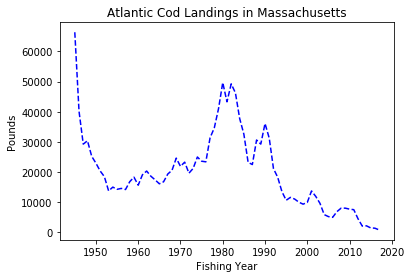

In [173]:
x = ma["Year"]
y = ma["Tons"]
plt.plot(x, y, "b--")
plt.ylabel("Pounds")
plt.xlabel("Fishing Year")
plt.title("Atlantic Cod Landings in Massachusetts")

#### Conculsion

According to the above graph, the cod harvest in Massachusetts dropped significantly beteen the early nineties and 2010. An initial assessment of the data showed that Massachusetts had the highest harvests of any atlantic state and was most affected by the drop. It is unclear whether the amount harvested before 1950 is an error similar to the Sardine dataset or indicative of significantly higher pre-1950's data. Depending on what variables may be related to Atlantic Cod breeding, s strategy to restrict overfishing simialr to the one discussed for Sardines may be benefical. However, due to the apparent depletion, the Atlantic Cod may not return in the near future. 